In [1]:
import os
import torch
import random

from PIL import Image
from tqdm import tqdm

from diffusers import StableDiffusionXLPipeline
from ip_adapter import IPAdapterPlusXL

### plus_sdxl
base_model_path = "SG161222/RealVisXL_V1.0"
image_encoder_path = "models/image_encoder"
# image_encoder_path = "sdxl_models/image_encoder"
ip_ckpt = "sdxl_models/ip-adapter-plus_sdxl_vit-h.bin"
device = "cuda"

### sdxl
# base_model_path = "stabilityai/stable-diffusion-xl-base-1.0"
# image_encoder_path = "sdxl_models/image_encoder"
# ip_ckpt = "sdxl_models/ip-adapter_sdxl.bin"
# device = "cuda"

### sd multimodal
# base_model_path = "SG161222/Realistic_Vision_V4.0_noVAE"
# vae_model_path = "stabilityai/sd-vae-ft-mse"
# image_encoder_path = "models/image_encoder/"
# ip_ckpt = "models/ip-adapter_sd15.bin"
# device = "cuda"

pascal_images_root_path = 'VOCdevkit/VOC2012/JPEGImages'

num_samples = 2

/home/ydseo/miniconda3/envs/ipa/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [3]:
pipe = StableDiffusionXLPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    add_watermarker=False,
)

ip_model = IPAdapterPlusXL(pipe, image_encoder_path, ip_ckpt, device, num_tokens=16)

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.25it/s]


In [4]:
images_list = sorted([pascal_images_root_path + '/' + path for path in os.listdir(pascal_images_root_path)])
len(images_list)

17125

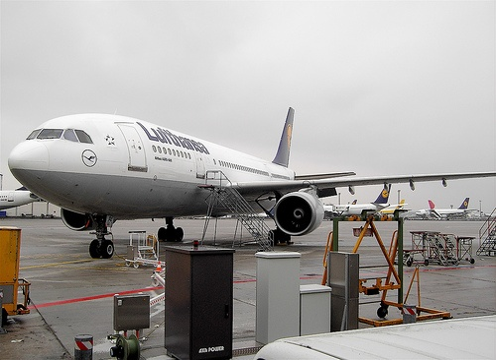

In [5]:
index = 2

image = Image.open(images_list[index])

resized_width, resized_height = image.width - (image.width % 8), image.height - (image.height % 8)
image = image.resize((resized_width, resized_height))
image.resize((resized_width, resized_height))

100%|██████████| 30/30 [00:12<00:00,  2.48it/s]


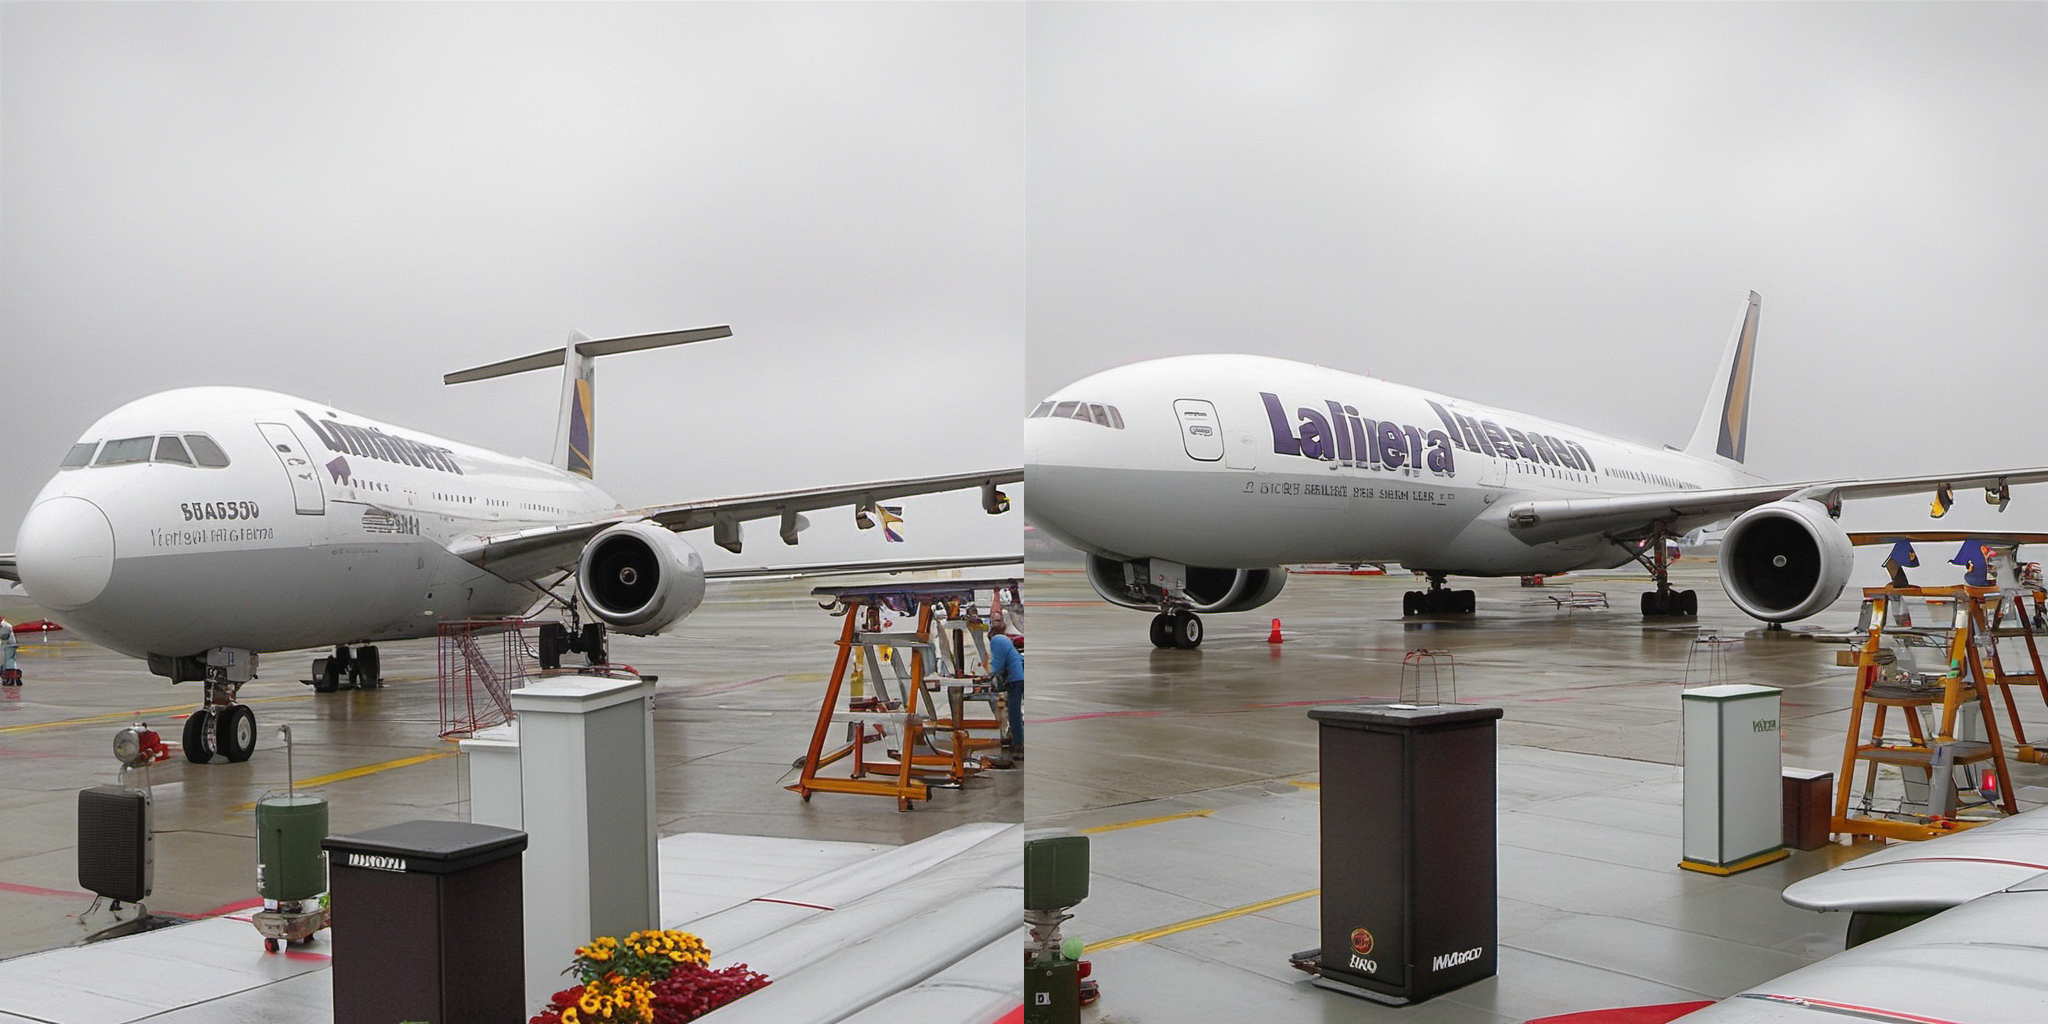

In [6]:
images = ip_model.generate(pil_image=image, num_samples=num_samples, num_inference_steps=30, seed=4212, prompt="high quality, best quality, waiting to take off in rainy weather", scale = 0.8)
grid = image_grid(images, 1, num_samples)
grid

In [8]:
images[0].save('plus_sdxl_0.jpg')
images[1].save('plus_sdxl_1.jpg')